In [1]:
# Semantic Similarity
#### For recommendation system
#### Data preprocessing and removing duplicates

In [2]:
import spacy
nlp = spacy.load('en')

In [6]:
d1 = nlp("wolf")
d2 = nlp("dog")
d3 = nlp("sheep")
d4 = nlp("fox")
d5 = nlp("cat")

In [7]:
d1.similarity(d2)

0.6759107766441167

In [8]:
d1.similarity(d4)

0.5568840165342445

In [9]:
d5.similarity(d2)

0.7344887261266053

In [10]:
# Synonyms
d6 = nlp("smart")
d7 = nlp("clever")

In [11]:
d6.similarity(d7)

0.805182567691138

In [12]:
d = nlp("wolf dog sheep fox cat")

In [14]:
for token1 in d:
    for token2 in d:
        print((token1.text,token2.text),"Similarity =>",token1.similarity(token2))

('wolf', 'wolf') Similarity => 1.0
('wolf', 'dog') Similarity => 0.5007198
('wolf', 'sheep') Similarity => 0.2137488
('wolf', 'fox') Similarity => 0.34195685
('wolf', 'cat') Similarity => 0.04639692
('dog', 'wolf') Similarity => 0.5007198
('dog', 'dog') Similarity => 1.0
('dog', 'sheep') Similarity => 0.4158459
('dog', 'fox') Similarity => 0.4855924
('dog', 'cat') Similarity => 0.41966495
('sheep', 'wolf') Similarity => 0.2137488
('sheep', 'dog') Similarity => 0.4158459
('sheep', 'sheep') Similarity => 1.0
('sheep', 'fox') Similarity => 0.35053626
('sheep', 'cat') Similarity => 0.37231827
('fox', 'wolf') Similarity => 0.34195685
('fox', 'dog') Similarity => 0.4855924
('fox', 'sheep') Similarity => 0.35053626
('fox', 'fox') Similarity => 1.0
('fox', 'cat') Similarity => 0.40671986
('cat', 'wolf') Similarity => 0.04639692
('cat', 'dog') Similarity => 0.41966495
('cat', 'sheep') Similarity => 0.37231827
('cat', 'fox') Similarity => 0.40671986
('cat', 'cat') Similarity => 1.0


In [18]:
mylist = [(token1.text,token2.text,token1.similarity(token2)) for token2 in d for token1 in d]

In [19]:
mylist

[('wolf', 'wolf', 1.0),
 ('dog', 'wolf', 0.5007198),
 ('sheep', 'wolf', 0.2137488),
 ('fox', 'wolf', 0.34195685),
 ('cat', 'wolf', 0.04639692),
 ('wolf', 'dog', 0.5007198),
 ('dog', 'dog', 1.0),
 ('sheep', 'dog', 0.4158459),
 ('fox', 'dog', 0.4855924),
 ('cat', 'dog', 0.41966495),
 ('wolf', 'sheep', 0.2137488),
 ('dog', 'sheep', 0.4158459),
 ('sheep', 'sheep', 1.0),
 ('fox', 'sheep', 0.35053626),
 ('cat', 'sheep', 0.37231827),
 ('wolf', 'fox', 0.34195685),
 ('dog', 'fox', 0.4855924),
 ('sheep', 'fox', 0.35053626),
 ('fox', 'fox', 1.0),
 ('cat', 'fox', 0.40671986),
 ('wolf', 'cat', 0.04639692),
 ('dog', 'cat', 0.41966495),
 ('sheep', 'cat', 0.37231827),
 ('fox', 'cat', 0.40671986),
 ('cat', 'cat', 1.0)]

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(mylist)

In [22]:
df.head()

,0,1,2
0,wolf,wolf,1.000000
1,dog,wolf,0.500720
2,sheep,wolf,0.213749
3,fox,wolf,0.341957
4,cat,wolf,0.046397


In [23]:
df.corr()

,2
2,1.0


In [24]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [25]:
df.columns = ["Token1", "Token2", "Similarity"]

In [26]:
df

,Token1,Token2,Similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.500720
2,sheep,wolf,0.213749
3,fox,wolf,0.341957
4,cat,wolf,0.046397
5,wolf,dog,0.500720
6,dog,dog,1.000000
7,sheep,dog,0.415846
8,fox,dog,0.485592
9,cat,dog,0.419665


In [27]:
df_viz = df.replace({'wolf':0,'dog':1,'sheep':2,'fox':3,'cat':4})

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

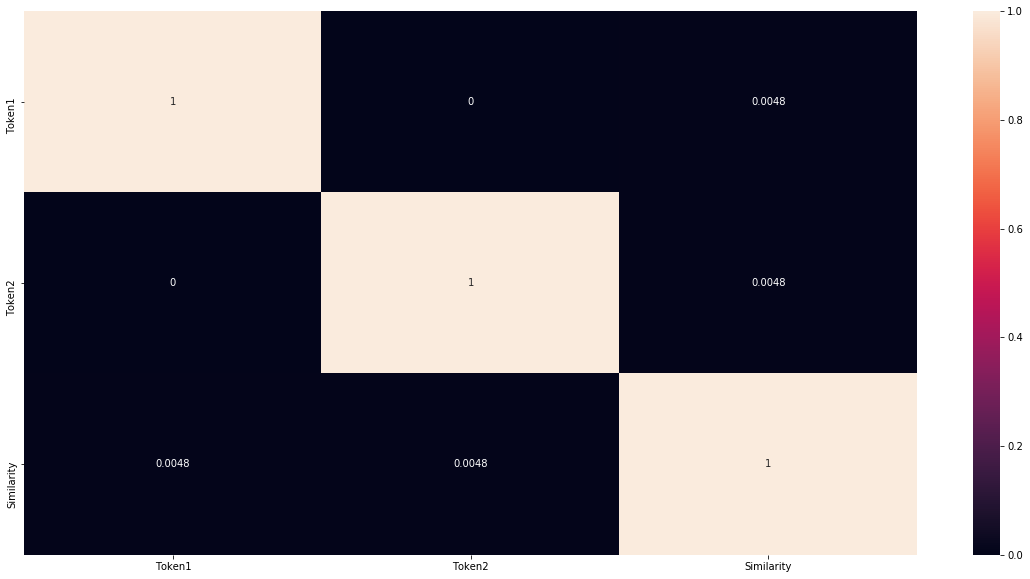

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df_viz.corr(),annot=True)
plt.show()